## Setup

In [1]:
# Packages
import pandas as pd
import torch
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
%matplotlib inline
import pylab
import math

In [2]:
# Import data
tor_df = pd.read_csv("/home/jeremy/github_tornadoesr/data/raw/tor_train_set_no_zeros.csv")


# Quick inspection
tor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8308 entries, 0 to 8307
Data columns (total 35 columns):
DAMAGE_PROPERTY       8308 non-null float64
DURATION_SECONDS      8308 non-null float64
BEGIN_LAT             8308 non-null float64
BEGIN_LON             8308 non-null float64
TOR_LENGTH            8308 non-null float64
TOR_WIDTH             8308 non-null float64
YEAR                  8308 non-null float64
MULTI_VORT_IND        8308 non-null int64
OPEN_WATER_PROP       8308 non-null float64
DEV_OPEN_PROP         8308 non-null float64
DEV_LOW_PROP          8308 non-null float64
DEV_MED_PROP          8308 non-null float64
DEV_HIGH_PROP         8308 non-null float64
BARREN_LAND_PROP      8308 non-null float64
DECID_FOREST_PROP     8308 non-null float64
EVERGR_FOREST_PROP    8308 non-null float64
MIXED_FOREST_PROP     8308 non-null float64
SHRUB_SCRUB_PROP      8308 non-null float64
GRASS_LAND_PROP       8308 non-null float64
PASTURE_HAY_PROP      8308 non-null float64
CULT_CROPS_PROP

In [3]:
# Seperating variables
# The dependent variables
tornado_outcomes = tor_df.iloc[:, [0]]


# Quick inspection
tornado_outcomes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8308 entries, 0 to 8307
Data columns (total 1 columns):
DAMAGE_PROPERTY    8308 non-null float64
dtypes: float64(1)
memory usage: 65.0 KB


In [4]:
# The independent variables
tornado_features = tor_df.loc[:, ["DURATION_SECONDS",
                                  "TOR_LENGTH",
                                  "TOR_WIDTH",
                                  "YEAR",
                                  "MULTI_VORT_IND",
                                  "TOR_AREA",
                                  "DAY_OF_YEAR",
                                  "MONTH",
                                  "TIME"]]


# Quick inspection
tornado_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8308 entries, 0 to 8307
Data columns (total 9 columns):
DURATION_SECONDS    8308 non-null float64
TOR_LENGTH          8308 non-null float64
TOR_WIDTH           8308 non-null float64
YEAR                8308 non-null float64
MULTI_VORT_IND      8308 non-null int64
TOR_AREA            8308 non-null float64
DAY_OF_YEAR         8308 non-null float64
MONTH               8308 non-null float64
TIME                8308 non-null float64
dtypes: float64(8), int64(1)
memory usage: 584.2 KB


In [5]:
# Make the dependent variables into a numpy array
outcomes_array = tornado_outcomes.values


# Makes the numpy array into a torch Tensor
outcomes_Tensor = torch.from_numpy(outcomes_array)


# Quick inspection
outcomes_Tensor


 0.1532
 0.6540
 0.0873
   ⋮    
 0.5790
 0.1532
 0.2814
[torch.DoubleTensor of size 8308x1]

In [6]:
# Make the independent variables into a numpy array
features_array = tornado_features.values


# Make the numpy array into a torch Tensor
features_Tensor = torch.from_numpy(features_array)


# Quick inspection
features_Tensor


 0.0227 -0.4127 -0.7859  ...  -0.0068 -0.2947 -0.4531
-0.3046 -1.0358 -0.9368  ...  -0.1143 -0.2947  1.1092
 0.3520  0.0818 -0.9368  ...  -0.9653 -1.0297 -0.1038
          ...             ⋱             ...          
 0.5451  0.6778 -0.3589  ...  -0.7735 -1.0297 -1.5301
 0.0227 -0.4127 -0.7859  ...   0.8091  0.8078 -2.1918
 0.4583  0.9771 -0.3589  ...  -2.1091 -1.7647  0.5064
[torch.DoubleTensor of size 8308x9]

### Convert DoubleTensor to FloatTensor

In [7]:
# Changing dependent variables from a DoubleTensor to a FloatTensor
outcomes_Tensor = outcomes_Tensor.float()


# ...and for the independent variables
features_Tensor = features_Tensor.float()


# Quick check
features_Tensor


 0.0227 -0.4127 -0.7859  ...  -0.0068 -0.2947 -0.4531
-0.3046 -1.0358 -0.9368  ...  -0.1143 -0.2947  1.1092
 0.3520  0.0818 -0.9368  ...  -0.9653 -1.0297 -0.1038
          ...             ⋱             ...          
 0.5451  0.6778 -0.3589  ...  -0.7735 -1.0297 -1.5301
 0.0227 -0.4127 -0.7859  ...   0.8091  0.8078 -2.1918
 0.4583  0.9771 -0.3589  ...  -2.1091 -1.7647  0.5064
[torch.FloatTensor of size 8308x9]

## Round 1: One-Hidden-Layer Neural Network

In [8]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [9]:
# Make the neural network
model = torch.nn.Sequential(torch.nn.Linear(9, 6),
                            torch.nn.ReLU(),
                            torch.nn.Linear(6, 1))

In [10]:
# Set the loss function
loss_fn = torch.nn.MSELoss(size_average=False)

In [11]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 1e-2


# Define the model's optimizer
optimizer = torch.optim.Adagrad(model.parameters(), lr = learning_rate)


# Train the neural network
for t in range(15000):
    
    # Get the current predictions
    y_pred = model(features_Variable)
    
    # Compute and append current summed errors
    loss = loss_fn(y_pred, outcomes_Variable)
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    optimizer.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using Adagrad
    optimizer.step()

In [12]:
# Get the iterations
iterations = list(range(0, 15000))

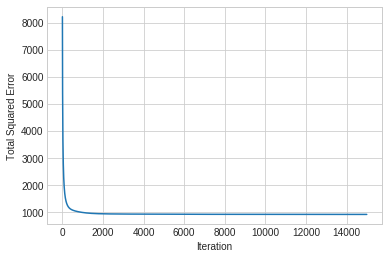

In [13]:
# Plot summed error as a function of iteration
plt.plot(iterations, errors)

plt.xlabel("Iteration")

plt.ylabel("Total Squared Error")

In [14]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(8308)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()


# This is for the validation performance plot later
y_pred_array_for_perf = y_pred_resized.data.numpy()*5.407597 + 7.688844

y_pred_list_for_perf = y_pred_array_for_perf.tolist()

In [15]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
outcomes_Variable_resized = outcomes_Variable.resize(8308)


# Make the FloatTensor into a numpy.array
outcomes_array = outcomes_Variable_resized.data.numpy()


# Make the numpy.array into a list
outcomes_list = outcomes_array.tolist()


# This is for the validation performance plot later
outcomes_array_for_perf = outcomes_Variable_resized.data.numpy()*5.407597 + 7.688844

outcomes_list_for_perf = outcomes_array_for_perf.tolist()

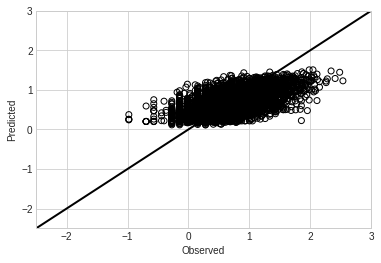

In [16]:
# Plot predictions versus training set outcomes
plt.scatter(outcomes_list, y_pred_list, facecolors = "none", edgecolors = "k")

axes = plt.gca()

axes.set_xlim([-2.5, 3])

axes.set_ylim([-2.5, 3])

plt.plot([-2.5, 3], [-2.5, 3], 'k-', lw = 2)

plt.xlabel("Observed")

plt.ylabel("Predicted")

### Round 1.1: Validation Set Performance

In [17]:
# Import data
valid_df = pd.read_csv("/home/jeremy/github_tornadoesr/data/raw/tor_cv_set_no_zeros.csv")


# Validation set outcomes
valid_outcomes = valid_df.iloc[:, [0]]


# Make the validation outcomes into a numpy array
valid_outcomes_array = valid_outcomes.values


# Makes the numpy array into a torch Tensor
valid_outcomes_Tensor = torch.from_numpy(valid_outcomes_array)


# Changing validation outcomes from a DoubleTensor to a FloatTensor
valid_outcomes_Tensor = valid_outcomes_Tensor.float()


# Make the Tensor into a Pytorch Variable
valid_outcomes_Variable = Variable(valid_outcomes_Tensor)


# Quick check
valid_outcomes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2808 entries, 0 to 2807
Data columns (total 1 columns):
DAMAGE_PROPERTY    2808 non-null float64
dtypes: float64(1)
memory usage: 22.0 KB


In [18]:
# Validation set predictors
valid_predictors = valid_df.loc[:, ["DURATION_SECONDS",
                                    "TOR_LENGTH",
                                    "TOR_WIDTH",
                                    "YEAR",
                                    "MULTI_VORT_IND",
                                    "TOR_AREA",
                                    "DAY_OF_YEAR",
                                    "MONTH",
                                   "TIME"]]


# Make the validation predictors into a numpy array
valid_predictors_array = valid_predictors.values


# Makes the numpy array into a torch Tensor
valid_predictors_Tensor = torch.from_numpy(valid_predictors_array)


# Changing validation predictors from a DoubleTensor to a FloatTensor
valid_predictors_Tensor = valid_predictors_Tensor.float()


# Make the Tensor into a Pytorch Variable
valid_predictors_Variable = Variable(valid_predictors_Tensor)


# Quick check
valid_predictors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2808 entries, 0 to 2807
Data columns (total 9 columns):
DURATION_SECONDS    2808 non-null float64
TOR_LENGTH          2808 non-null float64
TOR_WIDTH           2808 non-null float64
YEAR                2808 non-null float64
MULTI_VORT_IND      2808 non-null int64
TOR_AREA            2808 non-null float64
DAY_OF_YEAR         2808 non-null float64
MONTH               2808 non-null float64
TIME                2808 non-null float64
dtypes: float64(8), int64(1)
memory usage: 197.5 KB


In [19]:
# Get the validation set predictions
y_valid_pred = model(valid_predictors_Variable)


# Get the loss - (total) residual sum of squares
total_SE = loss_fn(y_valid_pred, valid_outcomes_Variable)


# Average that to get mean square error
mean_SE = total_SE / len(y_valid_pred)

mean_SE

Variable containing:
 0.1100
[torch.FloatTensor of size 1]

In [20]:
# Computing the total sum of squares
# Get a torch Variable of the mean outcome
# Compute mean value
valid_outcomes_mean = (sum(valid_outcomes_Variable) / len(valid_outcomes_Variable))
valid_outcomes_mean = valid_outcomes_mean.data.numpy()[0]

# Make that into a ndarray
valid_outcomes_mean = np.repeat(valid_outcomes_mean, len(valid_outcomes_Variable))

# Turn the array into a torch Tensor
valid_outcomes_mean = torch.from_numpy(valid_outcomes_mean)

# Turn that Tensor into a Variable
valid_outcomes_mean_Variable = Variable(valid_outcomes_mean)

# Compute the TSS
tot_sum_squares = loss_fn(valid_outcomes_mean_Variable, valid_outcomes_Variable)


# Grab the residual sum of squares
resid_sum_squares = loss_fn(y_valid_pred, valid_outcomes_Variable)


# Compute R squared
R_squared = 1 - (resid_sum_squares / tot_sum_squares)

R_squared

Variable containing:
 0.3502
[torch.FloatTensor of size 1]

In [21]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(2808)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Convert back to log scale
y_valid_pred_array = y_valid_pred_array*5.407597 + 7.688844


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

In [22]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
valid_outcomes_Variable_resized = valid_outcomes_Variable.resize(2808)


# Make the FloatTensor into a numpy.array
valid_outcomes_array = valid_outcomes_Variable_resized.data.numpy()


# Convert back to log scale
valid_outcomes_array = valid_outcomes_array*5.407597 + 7.688844


# Make the numpy.array into a list
valid_outcomes_list = valid_outcomes_array.tolist()

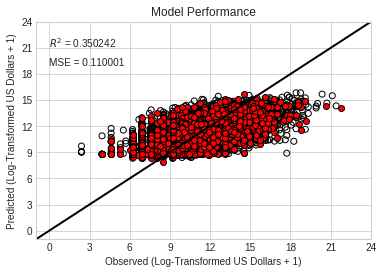

In [23]:
# Plot new predictions versus new data outcomes
plt.scatter(outcomes_list_for_perf, y_pred_list_for_perf, facecolors = "none",
            edgecolors = "k")

plt.scatter(valid_outcomes_list, y_valid_pred_list, facecolors = "r",
            edgecolors = "k")

axes = plt.gca()

axes.set_xlim([-1, 24])

axes.set_ylim([-1, 24])

axes.set_xticks([0, 3, 6, 9, 12, 15, 18, 21, 24])

axes.set_yticks([0, 3, 6, 9, 12, 15, 18, 21, 24])

plt.plot([-1, 24], [-1, 24], 'k-', lw = 2)

axes.set_xlabel("Observed (Log-Transformed US Dollars + 1)")

axes.set_ylabel("Predicted (Log-Transformed US Dollars + 1)")

axes.set_title("Model Performance")

plt.text(0, 21, r"$R^2$ = %s"%(R_squared.data.numpy()[0]))

plt.text(0, 19, "MSE = %s"%(mean_SE.data.numpy()[0]))

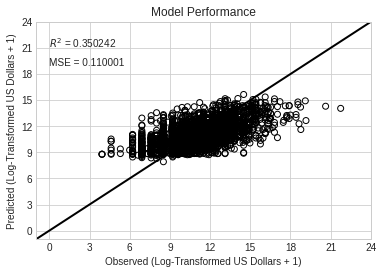

In [24]:
# Plot new predictions versus new data outcomes
plt.scatter(valid_outcomes_list, y_valid_pred_list, facecolors = "none",
            edgecolors = "k")

axes = plt.gca()

axes.set_xlim([-1, 24])

axes.set_ylim([-1, 24])

axes.set_xticks([0, 3, 6, 9, 12, 15, 18, 21, 24])

axes.set_yticks([0, 3, 6, 9, 12, 15, 18, 21, 24])

plt.plot([-1, 24], [-1, 24], 'k-', lw = 2)

axes.set_xlabel("Observed (Log-Transformed US Dollars + 1)")

axes.set_ylabel("Predicted (Log-Transformed US Dollars + 1)")

axes.set_title("Model Performance")

plt.text(0, 21, r"$R^2$ = %s"%(R_squared.data.numpy()[0]))

plt.text(0, 19, "MSE = %s"%(mean_SE.data.numpy()[0]))

In [25]:
model[(0)].weight

Parameter containing:
 0.0725 -0.1296 -0.0745 -0.2190 -0.0544  0.1260 -0.0155  0.1654  0.0057
 0.0627 -0.0968  0.0775  0.3318 -0.3076  0.1998  0.0446 -0.1255  0.0069
 0.0298  0.1539  0.1555 -0.4757  0.3846  0.2102 -0.0968  0.1960 -0.0010
-0.0393 -0.2002 -0.0518  0.6232  0.0662  0.0952  0.1922 -0.2421 -0.0301
 0.1484 -0.2131 -0.0661 -0.2749  0.1327  0.3878  0.1077 -0.0867 -0.0098
-0.0421  0.1268 -0.0189 -0.0933 -0.3118  0.1130  0.0780 -0.0151  0.1544
[torch.FloatTensor of size 6x9]

## Round 2: Two-Hidden-Layer Neural Network

In [26]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [27]:
# Make the neural network
model = torch.nn.Sequential(torch.nn.Linear(9, 6),
                            torch.nn.ReLU(),
                            torch.nn.Linear(6, 4),
                            torch.nn.ReLU(),
                            torch.nn.Linear(4, 1))

In [28]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 1e-2


# Define the model's optimizer
optimizer = torch.optim.Adagrad(model.parameters(), lr = learning_rate)


# Train the neural network
for t in range(15000):
    
    # Get the current predictions
    y_pred = model(features_Variable)
    
    # Compute and append current summed errors
    loss = loss_fn(y_pred, outcomes_Variable)
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    optimizer.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using Adagrad
    optimizer.step()

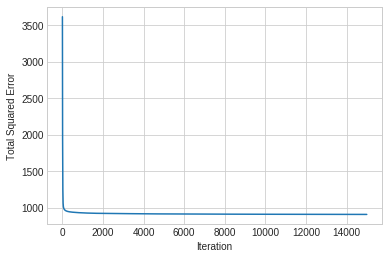

In [29]:
# Plot summed error as a function of iteration
plt.plot(iterations, errors)

plt.xlabel("Iteration")

plt.ylabel("Total Squared Error")

In [30]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(8308)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()


# This is for the validation performance plot later
y_pred_array_for_perf = y_pred_resized.data.numpy()*5.407597 + 7.688844

y_pred_list_for_perf = y_pred_array_for_perf.tolist()

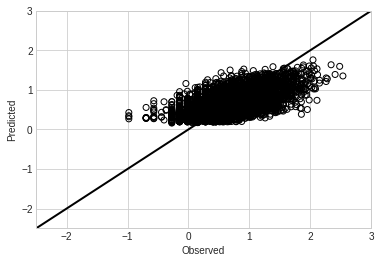

In [31]:
# Plot predictions versus training set outcomes
plt.scatter(outcomes_list, y_pred_list, facecolors = "none", edgecolors = "k")

axes = plt.gca()

axes.set_xlim([-2.5, 3])

axes.set_ylim([-2.5, 3])

plt.plot([-2.5, 3], [-2.5, 3], 'k-', lw = 2)

plt.xlabel("Observed")

plt.ylabel("Predicted")

### Round 2.1: Validation Set Performance

In [32]:
# Get the validation set predictions
y_valid_pred = model(valid_predictors_Variable)


# Get the loss - (total) residual sum of squares
total_SE = loss_fn(y_valid_pred, valid_outcomes_Variable)


# Average that to get mean square error
mean_SE = total_SE / len(y_valid_pred)

mean_SE

Variable containing:
 0.1083
[torch.FloatTensor of size 1]

In [33]:
# Grab the residual sum of squares
resid_sum_squares = loss_fn(y_valid_pred, valid_outcomes_Variable)


# Compute R squared
R_squared = 1 - (resid_sum_squares / tot_sum_squares)

R_squared

Variable containing:
 0.3605
[torch.FloatTensor of size 1]

In [34]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(2808)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Convert back to log scale
y_valid_pred_array = y_valid_pred_array*5.407597 + 7.688844


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

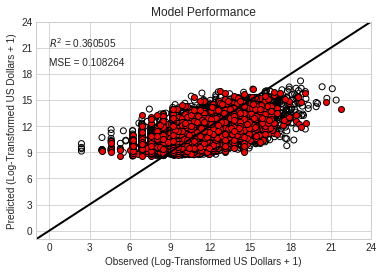

In [35]:
# Plot new predictions versus new data outcomes
plt.scatter(outcomes_list_for_perf, y_pred_list_for_perf, facecolors = "none",
            edgecolors = "k")

plt.scatter(valid_outcomes_list, y_valid_pred_list, facecolors = "r",
            edgecolors = "k")

axes = plt.gca()

axes.set_xlim([-1, 24])

axes.set_ylim([-1, 24])

axes.set_xticks([0, 3, 6, 9, 12, 15, 18, 21, 24])

axes.set_yticks([0, 3, 6, 9, 12, 15, 18, 21, 24])

plt.plot([-1, 24], [-1, 24], 'k-', lw = 2)

axes.set_xlabel("Observed (Log-Transformed US Dollars + 1)")

axes.set_ylabel("Predicted (Log-Transformed US Dollars + 1)")

axes.set_title("Model Performance")

plt.text(0, 21, r"$R^2$ = %s"%(R_squared.data.numpy()[0]))

plt.text(0, 19, "MSE = %s"%(mean_SE.data.numpy()[0]))

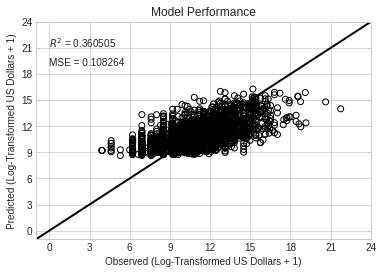

In [36]:
# Plot new predictions versus new data outcomes
plt.scatter(valid_outcomes_list, y_valid_pred_list, facecolors = "none",
            edgecolors = "k")

axes = plt.gca()

axes.set_xlim([-1, 24])

axes.set_ylim([-1, 24])

axes.set_xticks([0, 3, 6, 9, 12, 15, 18, 21, 24])

axes.set_yticks([0, 3, 6, 9, 12, 15, 18, 21, 24])

plt.plot([-1, 24], [-1, 24], 'k-', lw = 2)

axes.set_xlabel("Observed (Log-Transformed US Dollars + 1)")

axes.set_ylabel("Predicted (Log-Transformed US Dollars + 1)")

axes.set_title("Model Performance")

plt.text(0, 21, r"$R^2$ = %s"%(R_squared.data.numpy()[0]))

plt.text(0, 19, "MSE = %s"%(mean_SE.data.numpy()[0]))

In [37]:
model[(0)].weight

Parameter containing:
 0.2904  0.0383  0.2704  0.0469  0.0001 -0.0217  0.0001 -0.0402 -0.0098
 0.0402  0.2313 -0.0091 -0.3373 -0.6102  0.2624 -0.0570  0.0791  0.2039
-0.2169 -0.1677  0.2188 -0.4666  0.6839  0.1735  0.4987 -0.3050 -0.0109
-0.1710  0.3636  0.3677 -0.1491  0.4555 -0.2718 -0.0069  0.1992 -0.1531
-0.3350  0.3443  0.1186 -0.0006  0.1993  0.1967  0.0044 -0.2980 -0.4473
 0.2741  0.3280 -0.3563 -0.0442 -0.7525 -0.1040  0.0132 -0.0290 -0.0384
[torch.FloatTensor of size 6x9]

## Round 3: Three-Hidden-Layer Neural Network

In [38]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [39]:
# Make the neural network
model = torch.nn.Sequential(torch.nn.Linear(9, 6),
                            torch.nn.ReLU(),
                            torch.nn.Linear(6, 4),
                            torch.nn.ReLU(),
                            torch.nn.Linear(4, 3),
                            torch.nn.ReLU(),
                            torch.nn.Linear(3, 1))

In [40]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 1e-2


# Define the model's optimizer
optimizer = torch.optim.Adagrad(model.parameters(), lr = learning_rate)


# Train the neural network
for t in range(15000):
    
    # Get the current predictions
    y_pred = model(features_Variable)
    
    # Compute and append current summed errors
    loss = loss_fn(y_pred, outcomes_Variable)
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    optimizer.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using Adagrad
    optimizer.step()

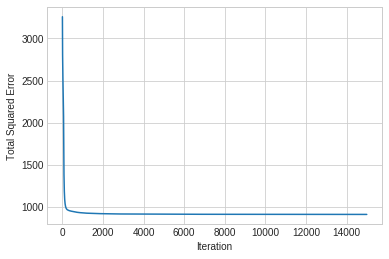

In [41]:
# Plot summed error as a function of iteration
plt.plot(iterations, errors)

plt.xlabel("Iteration")

plt.ylabel("Total Squared Error")

In [42]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(8308)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()


# This is for the validation performance plot later
y_pred_array_for_perf = y_pred_resized.data.numpy()*5.407597 + 7.688844

y_pred_list_for_perf = y_pred_array_for_perf.tolist()

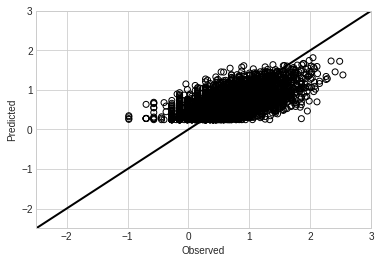

In [43]:
# Plot predictions versus training set outcomes
plt.scatter(outcomes_list, y_pred_list, facecolors = "none", edgecolors = "k")

axes = plt.gca()

axes.set_xlim([-2.5, 3])

axes.set_ylim([-2.5, 3])

plt.plot([-2.5, 3], [-2.5, 3], 'k-', lw = 2)

plt.xlabel("Observed")

plt.ylabel("Predicted")

### Round 3.1: Validation Set Performance

In [44]:
# Get the validation set predictions
y_valid_pred = model(valid_predictors_Variable)


# Get the loss - (total) residual sum of squares
total_SE = loss_fn(y_valid_pred, valid_outcomes_Variable)


# Average that to get mean square error
mean_SE = total_SE / len(y_valid_pred)

mean_SE

Variable containing:
 0.1097
[torch.FloatTensor of size 1]

In [45]:
# Grab the residual sum of squares
resid_sum_squares = loss_fn(y_valid_pred, valid_outcomes_Variable)


# Compute R squared
R_squared = 1 - (resid_sum_squares / tot_sum_squares)

R_squared

Variable containing:
 0.3522
[torch.FloatTensor of size 1]

In [46]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(2808)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Convert back to log scale
y_valid_pred_array = y_valid_pred_array*5.407597 + 7.688844


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

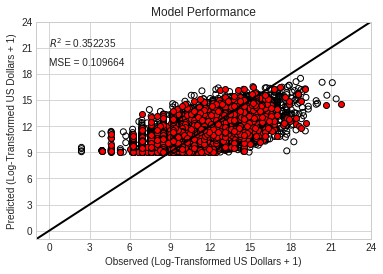

In [47]:
# Plot new predictions versus new data outcomes
plt.scatter(outcomes_list_for_perf, y_pred_list_for_perf, facecolors = "none",
            edgecolors = "k")

plt.scatter(valid_outcomes_list, y_valid_pred_list, facecolors = "r",
            edgecolors = "k")

axes = plt.gca()

axes.set_xlim([-1, 24])

axes.set_ylim([-1, 24])

axes.set_xticks([0, 3, 6, 9, 12, 15, 18, 21, 24])

axes.set_yticks([0, 3, 6, 9, 12, 15, 18, 21, 24])

plt.plot([-1, 24], [-1, 24], 'k-', lw = 2)

axes.set_xlabel("Observed (Log-Transformed US Dollars + 1)")

axes.set_ylabel("Predicted (Log-Transformed US Dollars + 1)")

axes.set_title("Model Performance")

plt.text(0, 21, r"$R^2$ = %s"%(R_squared.data.numpy()[0]))

plt.text(0, 19, "MSE = %s"%(mean_SE.data.numpy()[0]))

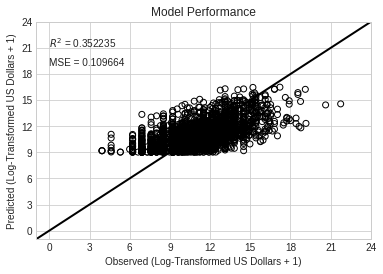

In [48]:
# Plot new predictions versus new data outcomes
plt.scatter(valid_outcomes_list, y_valid_pred_list, facecolors = "none",
            edgecolors = "k")

axes = plt.gca()

axes.set_xlim([-1, 24])

axes.set_ylim([-1, 24])

axes.set_xticks([0, 3, 6, 9, 12, 15, 18, 21, 24])

axes.set_yticks([0, 3, 6, 9, 12, 15, 18, 21, 24])

plt.plot([-1, 24], [-1, 24], 'k-', lw = 2)

axes.set_xlabel("Observed (Log-Transformed US Dollars + 1)")

axes.set_ylabel("Predicted (Log-Transformed US Dollars + 1)")

axes.set_title("Model Performance")

plt.text(0, 21, r"$R^2$ = %s"%(R_squared.data.numpy()[0]))

plt.text(0, 19, "MSE = %s"%(mean_SE.data.numpy()[0]))

In [49]:
model[(0)].weight

Parameter containing:
-0.2019  0.1514  0.0574  0.1093 -0.1441  0.1890 -0.1991 -0.6294 -0.0503
 0.4261 -0.0858  0.2398  0.0136 -0.1763  0.5372 -0.0016  0.1948 -0.0035
 0.0560 -0.0528  0.1532 -0.0777  0.6915  0.4370  0.1237 -0.0971  0.4937
-0.2806 -0.4120 -0.3292 -0.1024 -0.4693  0.0840  0.1185 -0.0482 -0.0310
-0.4356  0.2053 -0.0225 -0.1547  0.3119  0.4653  0.0613  0.0612 -0.2338
 0.3312  0.1210  0.1370 -0.0208 -0.6212  0.3463 -0.1183 -0.1020  0.0288
[torch.FloatTensor of size 6x9]

## Round 4: Four-Hidden-Layer Neural Network

In [50]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [51]:
# Make the neural network
model = torch.nn.Sequential(torch.nn.Linear(9, 6),
                            torch.nn.ReLU(),
                            torch.nn.Linear(6, 4),
                            torch.nn.ReLU(),
                            torch.nn.Linear(4, 3),
                            torch.nn.ReLU(),
                            torch.nn.Linear(3, 2),
                            torch.nn.ReLU(),
                            torch.nn.Linear(2, 1))

In [52]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 1e-2


# Define the model's optimizer
optimizer = torch.optim.Adagrad(model.parameters(), lr = learning_rate)


# Train the neural network
for t in range(15000):
    
    # Get the current predictions
    y_pred = model(features_Variable)
    
    # Compute and append current summed errors
    loss = loss_fn(y_pred, outcomes_Variable)
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    optimizer.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using Adagrad
    optimizer.step()

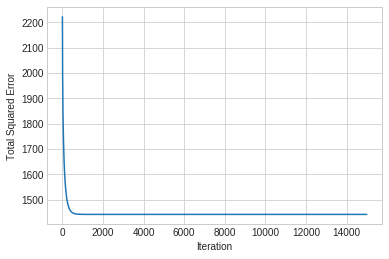

In [53]:
# Plot summed error as a function of iteration
plt.plot(iterations, errors)

plt.xlabel("Iteration")

plt.ylabel("Total Squared Error")

In [54]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(8308)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()


# This is for the validation performance plot later
y_pred_array_for_perf = y_pred_resized.data.numpy()*5.407597 + 7.688844

y_pred_list_for_perf = y_pred_array_for_perf.tolist()

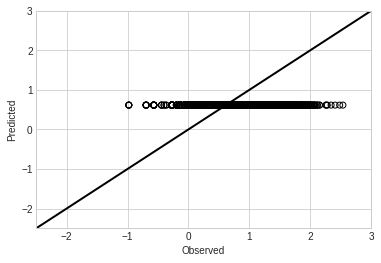

In [55]:
# Plot predictions versus training set outcomes
plt.scatter(outcomes_list, y_pred_list, facecolors = "none", edgecolors = "k")

axes = plt.gca()

axes.set_xlim([-2.5, 3])

axes.set_ylim([-2.5, 3])

plt.plot([-2.5, 3], [-2.5, 3], 'k-', lw = 2)

plt.xlabel("Observed")

plt.ylabel("Predicted")

### Round 4.1: Validation Set Performance

In [56]:
# Get the validation set predictions
y_valid_pred = model(valid_predictors_Variable)


# Get the loss - (total) residual sum of squares
total_SE = loss_fn(y_valid_pred, valid_outcomes_Variable)


# Average that to get mean square error
mean_SE = total_SE / len(y_valid_pred)

mean_SE

Variable containing:
 0.1693
[torch.FloatTensor of size 1]

In [57]:
# Grab the residual sum of squares
resid_sum_squares = loss_fn(y_valid_pred, valid_outcomes_Variable)


# Compute R squared
R_squared = 1 - (resid_sum_squares / tot_sum_squares)

R_squared

Variable containing:
1.00000e-05 *
 -5.3406
[torch.FloatTensor of size 1]

In [58]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(2808)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Convert back to log scale
y_valid_pred_array = y_valid_pred_array*5.407597 + 7.688844


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

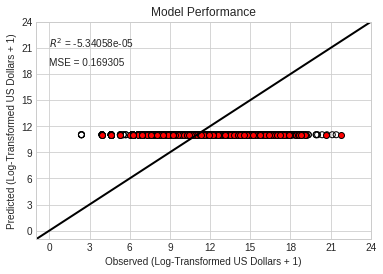

In [59]:
# Plot new predictions versus new data outcomes
plt.scatter(outcomes_list_for_perf, y_pred_list_for_perf, facecolors = "none",
            edgecolors = "k")

plt.scatter(valid_outcomes_list, y_valid_pred_list, facecolors = "r",
            edgecolors = "k")

axes = plt.gca()

axes.set_xlim([-1, 24])

axes.set_ylim([-1, 24])

axes.set_xticks([0, 3, 6, 9, 12, 15, 18, 21, 24])

axes.set_yticks([0, 3, 6, 9, 12, 15, 18, 21, 24])

plt.plot([-1, 24], [-1, 24], 'k-', lw = 2)

axes.set_xlabel("Observed (Log-Transformed US Dollars + 1)")

axes.set_ylabel("Predicted (Log-Transformed US Dollars + 1)")

axes.set_title("Model Performance")

plt.text(0, 21, r"$R^2$ = %s"%(R_squared.data.numpy()[0]))

plt.text(0, 19, "MSE = %s"%(mean_SE.data.numpy()[0]))

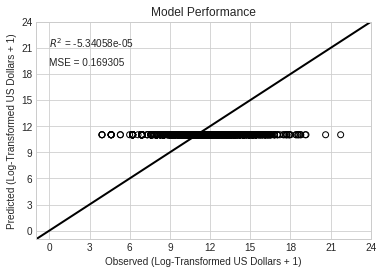

In [60]:
# Plot new predictions versus new data outcomes
plt.scatter(valid_outcomes_list, y_valid_pred_list, facecolors = "none",
            edgecolors = "k")

axes = plt.gca()

axes.set_xlim([-1, 24])

axes.set_ylim([-1, 24])

axes.set_xticks([0, 3, 6, 9, 12, 15, 18, 21, 24])

axes.set_yticks([0, 3, 6, 9, 12, 15, 18, 21, 24])

plt.plot([-1, 24], [-1, 24], 'k-', lw = 2)

axes.set_xlabel("Observed (Log-Transformed US Dollars + 1)")

axes.set_ylabel("Predicted (Log-Transformed US Dollars + 1)")

axes.set_title("Model Performance")

plt.text(0, 21, r"$R^2$ = %s"%(R_squared.data.numpy()[0]))

plt.text(0, 19, "MSE = %s"%(mean_SE.data.numpy()[0]))

In [61]:
model[(0)].weight

Parameter containing:
-0.1725 -0.1603 -0.1715  0.2327  0.0539 -0.0809  0.1567  0.1506  0.2793
 0.0256 -0.2298 -0.3223  0.2630 -0.2393 -0.2787  0.0743  0.2043 -0.2961
 0.2227 -0.0661  0.2030 -0.1941 -0.2189  0.0859 -0.2401 -0.0641  0.0105
 0.1099 -0.0126  0.1002  0.2741  0.1643 -0.1074 -0.2740  0.1045 -0.2707
-0.0800 -0.0161 -0.2136 -0.0653  0.1139  0.2617  0.0815  0.2813  0.3242
 0.1734 -0.3266  0.1146 -0.1704 -0.1477  0.2485  0.1093 -0.2458  0.1375
[torch.FloatTensor of size 6x9]

## Round 5: Linear Regression

In [62]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [63]:
# Make the neural network - really a regression
model = torch.nn.Sequential(torch.nn.Linear(9, 1))

In [64]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 1e-2


# Define the model's optimizer
optimizer = torch.optim.Adagrad(model.parameters(), lr = learning_rate)


# Train the neural network
for t in range(15000):
    
    # Get the current predictions
    y_pred = model(features_Variable)
    
    # Compute and append current summed errors
    loss = loss_fn(y_pred, outcomes_Variable)
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    optimizer.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using Adagrad
    optimizer.step()

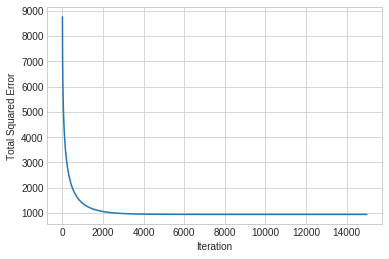

In [65]:
# Plot summed error as a function of iteration
plt.plot(iterations, errors)

plt.xlabel("Iteration")

plt.ylabel("Total Squared Error")

In [66]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(8308)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()


# This is for the validation performance plot later
y_pred_array_for_perf = y_pred_resized.data.numpy()*5.407597 + 7.688844

y_pred_list_for_perf = y_pred_array_for_perf.tolist()

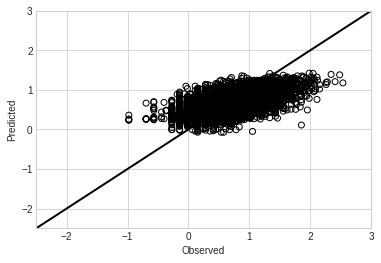

In [67]:
# Plot predictions versus training set outcomes
plt.scatter(outcomes_list, y_pred_list, facecolors = "none", edgecolors = "k")

axes = plt.gca()

axes.set_xlim([-2.5, 3])

axes.set_ylim([-2.5, 3])

plt.plot([-2.5, 3], [-2.5, 3], 'k-', lw = 2)

plt.xlabel("Observed")

plt.ylabel("Predicted")

### Round 5.1: Validation Set Performance

In [68]:
# Get the validation set predictions
y_valid_pred = model(valid_predictors_Variable)


# Get the loss - (total) residual sum of squares
total_SE = loss_fn(y_valid_pred, valid_outcomes_Variable)


# Average that to get mean square error
mean_SE = total_SE / len(y_valid_pred)

mean_SE

Variable containing:
 0.1116
[torch.FloatTensor of size 1]

In [69]:
# Grab the residual sum of squares
resid_sum_squares = loss_fn(y_valid_pred, valid_outcomes_Variable)


# Compute R squared
R_squared = 1 - (resid_sum_squares / tot_sum_squares)

R_squared

Variable containing:
 0.3407
[torch.FloatTensor of size 1]

In [70]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(2808)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Convert back to log scale
y_valid_pred_array = y_valid_pred_array*5.407597 + 7.688844


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

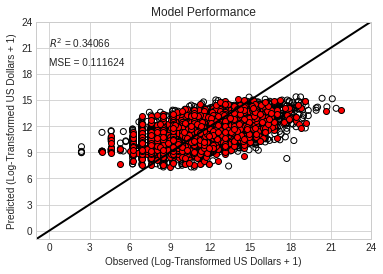

In [71]:
# Plot new predictions versus new data outcomes
plt.scatter(outcomes_list_for_perf, y_pred_list_for_perf, facecolors = "none",
            edgecolors = "k")

plt.scatter(valid_outcomes_list, y_valid_pred_list, facecolors = "r",
            edgecolors = "k")

axes = plt.gca()

axes.set_xlim([-1, 24])

axes.set_ylim([-1, 24])

axes.set_xticks([0, 3, 6, 9, 12, 15, 18, 21, 24])

axes.set_yticks([0, 3, 6, 9, 12, 15, 18, 21, 24])

plt.plot([-1, 24], [-1, 24], 'k-', lw = 2)

axes.set_xlabel("Observed (Log-Transformed US Dollars + 1)")

axes.set_ylabel("Predicted (Log-Transformed US Dollars + 1)")

axes.set_title("Model Performance")

plt.text(0, 21, r"$R^2$ = %s"%(R_squared.data.numpy()[0]))

plt.text(0, 19, "MSE = %s"%(mean_SE.data.numpy()[0]))

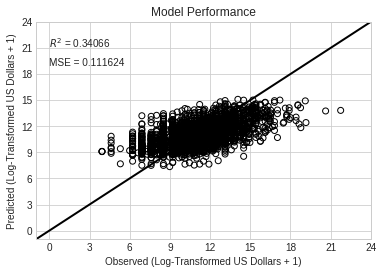

In [72]:
# Plot new predictions versus new data outcomes
plt.scatter(valid_outcomes_list, y_valid_pred_list, facecolors = "none",
            edgecolors = "k")

axes = plt.gca()

axes.set_xlim([-1, 24])

axes.set_ylim([-1, 24])

axes.set_xticks([0, 3, 6, 9, 12, 15, 18, 21, 24])

axes.set_yticks([0, 3, 6, 9, 12, 15, 18, 21, 24])

plt.plot([-1, 24], [-1, 24], 'k-', lw = 2)

axes.set_xlabel("Observed (Log-Transformed US Dollars + 1)")

axes.set_ylabel("Predicted (Log-Transformed US Dollars + 1)")

axes.set_title("Model Performance")

plt.text(0, 21, r"$R^2$ = %s"%(R_squared.data.numpy()[0]))

plt.text(0, 19, "MSE = %s"%(mean_SE.data.numpy()[0]))

In [73]:
model[(0)].weight

Parameter containing:
 0.0081  0.1592  0.1818 -0.0293  0.0122 -0.0648 -0.0330  0.0303  0.0095
[torch.FloatTensor of size 1x9]